In [1]:
from sympy import Symbol, integrate, sqrt
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_table(
    Q=5, # As taken in the paper
    pT=1, # As taken in the paper
    y=0.4, # As taken in the paper
    N=1, # N cancels out in the formulas below
    xB=1, # xB cancels out in the formulas below
    z_range=None,
    z_step=0.01,
):
    xi = Symbol('xi')
    phi = 30*(1-xi)*xi*(1-4*(1-xi)*xi) # distribution amplitude
    c = pT/Q
    
#     M=0.938
#     E=10.6
#     alpha=1./137.   
#     N = (4*3.14*alpha**2*M*E)/Q**4 
    
    def get_observables_as_a_function_of_z(z):

        func_1 = phi/(z-xi*(z**2 - c**2))
        func_2 = phi/(1 - xi)

        # Calculate integrals
        I1 = z*integrate(func_1, (xi, 0, 1)) # Eq. (13)
        I2 = integrate(func_2, (xi, 0, 1)) - z**2*I1
        
        # Calculate values of structure functions 
        H1 = N* 1/(2*xB)*(I2*I2 + c**4*I1*I1)
        H11 = N* 1/(2*xB)*(I2*I2)
        H2 = N*(I2*I2 + 4*c**2*z*z*I1*I1 + c**4*I1*I1)
        H22 = N*(I2*I2)
        H3 = N*2*z*I1*(I2-c**2*I1)
        H4 = -N*2*I1*I2
        
         # Calculate asymmetries and R 
        cos_denominator = xB * y**2 * H1 + (1-y) * H2
        cos_theta = 0.5 * c * ((2-y)*sqrt(1-y)*H3)/(cos_denominator) #Eq. (7)
        cos_2theta = 0.5 * c**2 * ((1-y)*H4)/(cos_denominator) #Eq. (8)
        R = (H2 - 2*xB*H1)/H2 #Eq. (9)
        cs_HT = (xB*y**2*H1+(1-y)*H2)
        cs_LT = (xB*y**2*H11+(1-y)*H22)
        Rat = cs_LT/cs_HT
        
        observables = dict(
            I1=I1,
            I2=I2,
            H1=H1,
            H2=H2,
            H3=H3,
            H4=H4,
            cos_theta=cos_theta,
            cos_2theta=cos_2theta,
            cos_denominator=cos_denominator,
            R=R,
            cs_HT=cs_HT,
            cd_LT=cs_LT,
            Rat=Rat
        )
        return observables
    
    z_range = z_range or (0.5, 1.01)
    
    z_arr = np.arange(*z_range, z_step)
    df = pd.DataFrame({'z': z_arr})
    
    def func_to_apply_to_each_row(row):
        observables_for_row = get_observables_as_a_function_of_z(row.z)
        return pd.Series(observables_for_row).astype(float)

    df_observables = (
        df.apply(
            func_to_apply_to_each_row,
            axis='columns'
        )
    )
    
    return (
        # create a dataframe with all columns from df and df_observables
        pd.concat(
            [df, df_observables],
            axis='columns'
        )
        # set index to z to make it easier to plot (the index is assumed by default to be the independent variable)
        .set_index('z')
    )


In [3]:
DF = get_table()
DF

I1        I2         H1         H2         H3         H4  \
z                                                                      
0.50  1.305732  4.673567  10.922478  21.913153   6.034231 -12.204856   
0.51  1.318365  4.657093  10.845649  21.763631   6.191630 -12.279498   
0.52  1.331288  4.640020  10.766310  21.609297   6.350561 -12.354404   
0.53  1.344516  4.622325  10.684392  21.450031   6.511030 -12.429581   
0.54  1.358065  4.603988  10.599829  21.285707   6.673043 -12.505034   
0.55  1.371953  4.584984  10.512546  21.116193   6.836601 -12.580764   
0.56  1.386196  4.565289  10.422469  20.941353   7.001706 -12.656770   
0.57  1.400814  4.544876  10.329517  20.761042   7.168357 -12.733047   
0.58  1.415825  4.523716  10.233608  20.575110   7.336548 -12.809585   
0.59  1.431253  4.501781  10.134655  20.383402   7.506271 -12.886372   
0.60  1.447118  4.479038  10.032565  20.185752   7.677514 -12.963389   
0.61  1.463444  4.455452   9.927241  19.981989   7.850260 -13.040612   
0.62  1.480258  4.430989   9.818584  19.771933   8.024486 -13.118013   
0.63  1.497586  4.405608   9.706485  19.555395   8.200165 -13.195555   
0.64  1.515458  4.379268   9.590833  19.332177   8.377259 -13.273196   
0.65  1.533905  4.351925   9.471508  19.102070   8.555724 -13.350882   
0.66  1.552961  4.323530   9.348385  18.864855   8.735506 -13.428551   
0.67  1.572663  4.294031   9.221332  18.620304   8.916540 -13.506131   
0.68  1.593050  4.263374   9.090208  18.368173   9.098746 -13.583534   
0.69  1.614164  4.231496   8.954865  18.108209   9.282031 -13.660661   
0.70  1.636053  4.198334   8.815146  17.840143   9.466281 -13.737392   
0.71  1.658766  4.163816   8.670884  17.563693   9.651364 -13.813591   
0.72  1.682358  4.127866   8.521902  17.278562   9.837122 -13.889095   
0.73  1.706890  4.090398   8.368010  16.984435  10.023368 -13.963719   
0.74  1.732427  4.051323   8.209010  16.680982  10.209883 -14.037243   
0.75  1.759042  4.010539   8.044687  16.367854  10.396405 -14.109412   
0.76  1.786814  3.967936   7.874813  16.044683  10.582629 -14.179928   
0.77  1.815832  3.923393   7.699146  15.711081  10.768191 -14.248444   
0.78  1.846192  3.876777   7.517425  15.366641  10.952663 -14.314550   
0.79  1.878004  3.827937   7.329374  15.010930  11.135536 -14.377767   
0.80  1.911390  3.776711   7.134694  14.643498  11.316206 -14.437531   
0.81  1.946484  3.722912   6.933068  14.263870  11.493957 -14.493174   
0.82  1.983439  3.666335   6.724155  13.871548  11.667932 -14.543908   
0.83  2.022430  3.606748   6.507588  13.466016  11.837105 -14.588791   
0.84  2.063652  3.543887   6.282975  13.046735  12.000246 -14.626700   
0.85  2.107330  3.477454   6.049895  12.613152  12.155868 -14.656288   
0.86  2.153723  3.407107   5.807899  12.164701  12.302166 -14.675926   
0.87  2.203128  3.332452   5.556503  11.700817  12.436943 -14.683638   
0.88  2.255894  3.253036   5.295193  11.220940  12.557496 -14.677006   
0.89  2.312428  3.168326   5.023422  10.724542  12.660486 -14.653051   
0.90  2.373215  3.077696   4.740611  10.211149  12.741747 -14.608068   
0.91  2.438833  2.980402   4.446156   9.680387  12.796034 -14.537408   
0.92  2.509983  2.875550   4.139434   9.132041  12.816671 -14.435166   
0.93  2.587524  2.762050   3.819818   8.566155  12.795053 -14.293744   
0.94  2.672524  2.638558   3.486707   7.983176  12.719918 -14.103218   
0.95  2.766339  2.503379   3.139575   7.384191  12.576271 -13.850390   
0.96  2.870723  2.354342   2.778055   6.771303  12.343720 -13.517326   
0.97  2.988008  2.188583   2.402091   6.148267  11.993810 -13.079008   
0.98  3.121399  2.002209   2.012214   5.521597  11.485534 -12.499383   
0.99  3.275487  1.789695   1.610087   4.902624  10.757282 -11.724246   
1.00  3.457246  1.542754   1.199607   4.311622   9.711157 -10.667361   

      cos_theta  cos_2theta  cos_denominator         R      cs_HT      cd_LT  \
z                                                                              
0.50   0.050207   -0.009832        

<AxesSubplot:xlabel='z'>

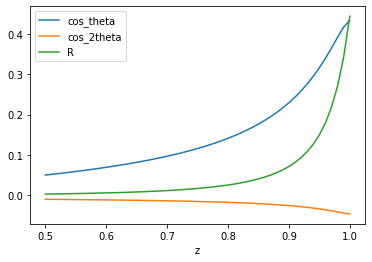

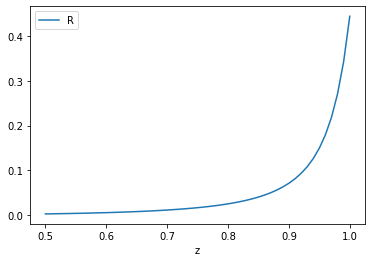

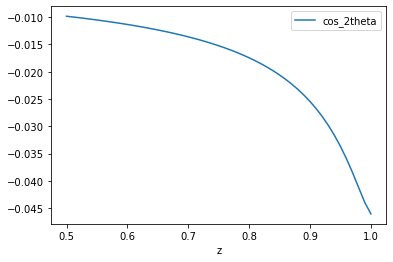

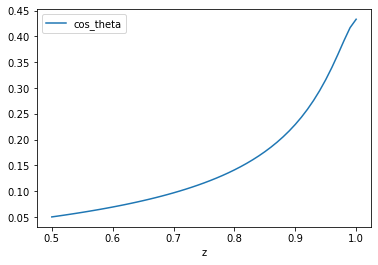

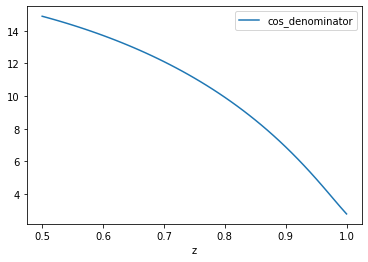

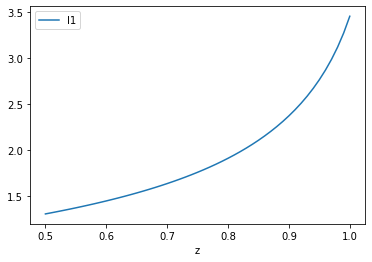

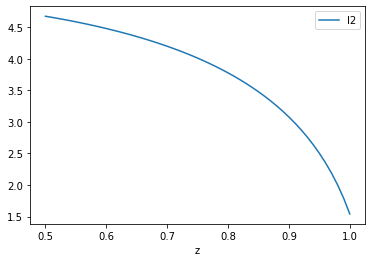

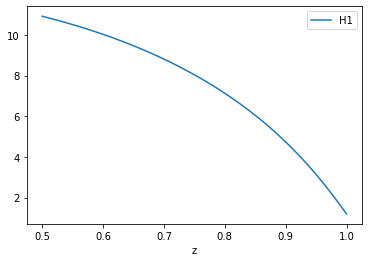

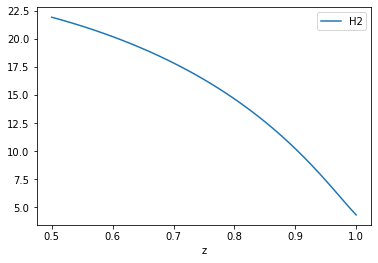

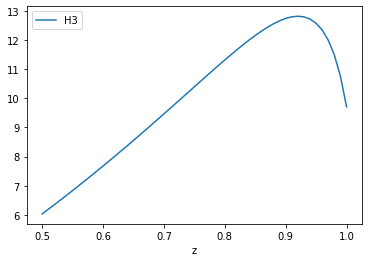

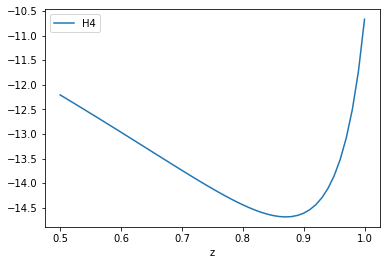

In [4]:
DF[['cos_theta', 'cos_2theta', 'R']].plot()
DF[['R']].plot()
DF[['cos_2theta']].plot()
DF[['cos_theta']].plot()
DF[['cos_denominator']].plot()
DF[['I1']].plot()
DF[['I2']].plot()
DF[['H1']].plot()
DF[['H2']].plot()
DF[['H3']].plot()
DF[['H4']].plot()